# Real Estate Portfolio Analysis

## Notebook Initialization and Configuration

### Add Imports

In [10]:
import pandas as pd
import alpaca_trade_api as tradeapi
import numpy as np
from pathlib import Path
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
import matplotlib.ticker as mticker


### Add Configuration

In [2]:
NUM_TRADING_DAYS = 252
NUM_SIMULATIONS = 1000
TICKERS = ['AMT', 'PLD', 'CCI', 'EQIX', 'PSA']
TIMEFRAME = '1D'
START_DATE_ET = '2018-01-01'
END_DATE_ET = '2021-11-05'
EXAMPLE_INVESTMENT = 10000

## Retrieve, Prepare, and Store Data

### Intialize Alpaca Trading API Client

In [3]:
# NOTE: Must have the APCA_API_KEY_ID and APCA_API_SECRET_KEY
# environment variables configured in the OS or in a .env file.
# Environment variables with this name are looked up by default
# by Alpaca.

load_dotenv()
alpaca = tradeapi.REST()

### Retrieve and Store Raw Data

In [4]:
start_date = pd.Timestamp(START_DATE_ET, tz='America/New_York').isoformat()
end_date = pd.Timestamp(END_DATE_ET, tz='America/New_York').isoformat()

prices_df = alpaca.get_barset(
                        symbols=TICKERS,
                        timeframe=TIMEFRAME,
                        limit=1000,
                        start=start_date,
                        end=end_date).df

prices_df.to_csv(Path('../data/real_estate_raw.csv'))

### Clean and Store data

In [5]:
#Check for non-float data types and missing data
display(prices_df.dtypes)
display(prices_df.isnull().sum())

prices_df = prices_df.dropna()
display(prices_df.isnull().sum())

prices_df.to_csv(Path('../data/real_estate_clean.csv'))

AMT   open      float64
      high      float64
      low       float64
      close     float64
      volume    float64
CCI   open      float64
      high      float64
      low       float64
      close     float64
      volume    float64
EQIX  open      float64
      high      float64
      low       float64
      close     float64
      volume    float64
PLD   open      float64
      high      float64
      low       float64
      close     float64
      volume    float64
PSA   open      float64
      high      float64
      low       float64
      close     float64
      volume    float64
dtype: object

AMT   open      1
      high      1
      low       1
      close     1
      volume    1
CCI   open      2
      high      2
      low       2
      close     2
      volume    2
EQIX  open      1
      high      1
      low       1
      close     1
      volume    1
PLD   open      1
      high      1
      low       1
      close     1
      volume    1
PSA   open      1
      high      1
      low       1
      close     1
      volume    1
dtype: int64

AMT   open      0
      high      0
      low       0
      close     0
      volume    0
CCI   open      0
      high      0
      low       0
      close     0
      volume    0
EQIX  open      0
      high      0
      low       0
      close     0
      volume    0
PLD   open      0
      high      0
      low       0
      close     0
      volume    0
PSA   open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

## Analyze Data

### Calculate Daily Returns (aggregated)

In [6]:
closing_prices_df = prices_df.xs('close',axis='columns',level=1)

daily_returns_df = closing_prices_df.sum(axis=1).pct_change().dropna()

print('DAILY RETURNS')
print('=============')
daily_returns_df

DAILY RETURNS


time
2018-01-03 00:00:00-05:00    0.002134
2018-01-04 00:00:00-05:00   -0.009190
2018-01-05 00:00:00-05:00   -0.003539
2018-01-08 00:00:00-05:00    0.018961
2018-01-09 00:00:00-05:00   -0.012539
                               ...   
2021-11-01 00:00:00-04:00   -0.003872
2021-11-02 00:00:00-04:00    0.010182
2021-11-03 00:00:00-04:00   -0.003233
2021-11-04 00:00:00-04:00   -0.021217
2021-11-05 00:00:00-04:00   -0.019934
Length: 966, dtype: float64

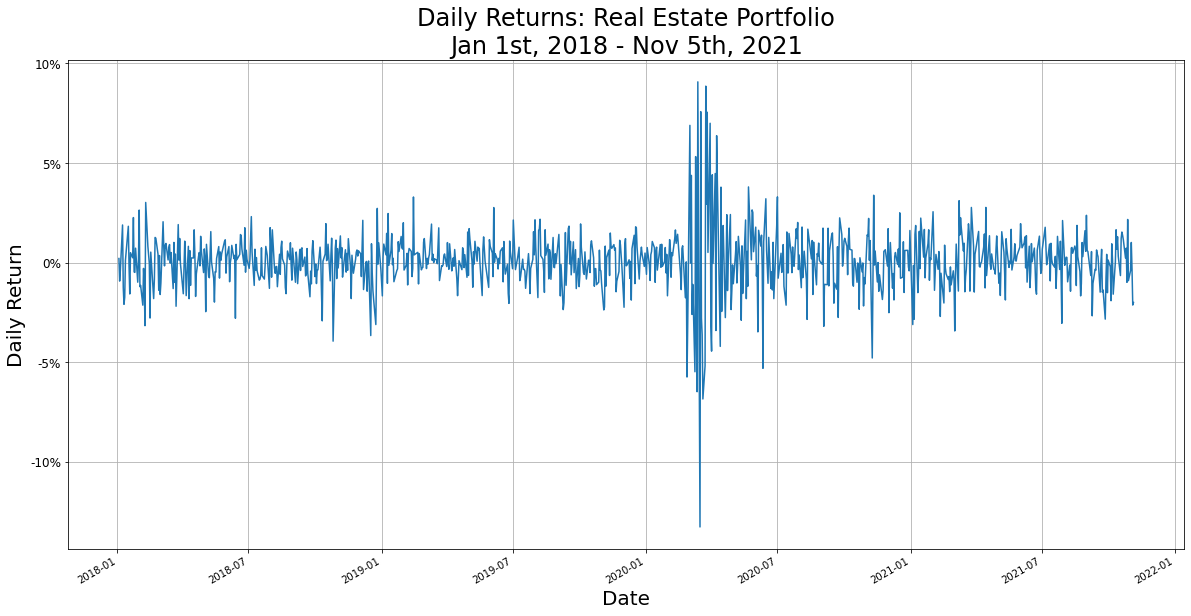

In [12]:
plot = daily_returns_df.plot(title='Daily Returns: Real Estate Portfolio\n'
                            'Jan 1st, 2018 - Nov 5th, 2021',
                            figsize=(20,10))
plot.set (xlabel='Date', ylabel='Daily Return')

#format the y-axis
title =  plot.get_title()
plot.set_title(title, fontdict={'fontsize':24})
plot.set_xlabel('Date', fontdict={'fontsize':20})
plot.set_ylabel('Daily Return', fontdict={'fontsize':20})
yticks_loc = plot.get_yticks().tolist()
plot.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
plot.set_yticklabels(['{:,.0%}'.format(x) for x in yticks_loc],fontdict={'fontsize':12})

plot.grid()

### Calculate Cumulative Return

In [7]:
cumulative_returns_df = (1 + daily_returns_df).cumprod() - 1

print('CUMULATIVE RETURNS')
print('==================')
cumulative_returns_df

CUMULATIVE RETURNS


time
2018-01-03 00:00:00-05:00    0.002134
2018-01-04 00:00:00-05:00   -0.007075
2018-01-05 00:00:00-05:00   -0.010590
2018-01-08 00:00:00-05:00    0.008171
2018-01-09 00:00:00-05:00   -0.004470
                               ...   
2021-11-01 00:00:00-04:00    0.829398
2021-11-02 00:00:00-04:00    0.848024
2021-11-03 00:00:00-04:00    0.842050
2021-11-04 00:00:00-04:00    0.802968
2021-11-05 00:00:00-04:00    0.767028
Length: 966, dtype: float64

In [8]:
cumulative_returns_df.to_csv(Path('../data/cum_returns_real_estate.csv'))

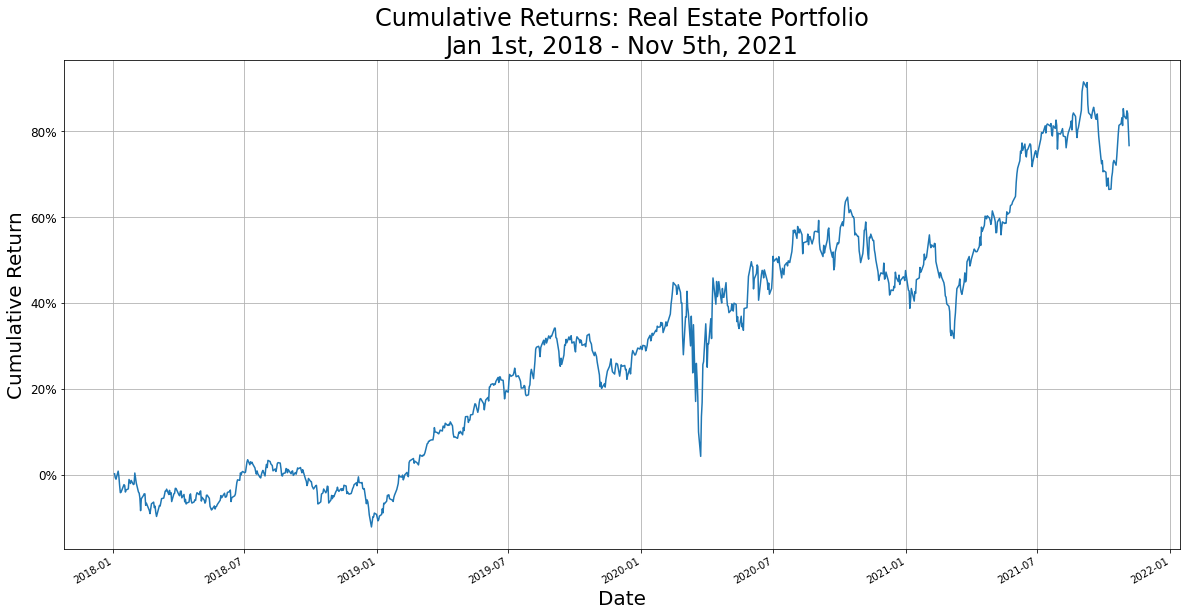

In [11]:
plot = cumulative_returns_df.plot(title='Cumulative Returns: Real Estate Portfolio\n'
                                'Jan 1st, 2018 - Nov 5th, 2021',
                                figsize=(20,10))

#format the y-axis
title =  plot.get_title()
plot.set_title(title, fontdict={'fontsize':24})
plot.set_xlabel('Date', fontdict={'fontsize':20})
plot.set_ylabel('Cumulative Return', fontdict={'fontsize':20})
yticks_loc = plot.get_yticks().tolist()
plot.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
plot.set_yticklabels(['{:,.0%}'.format(x) for x in yticks_loc],fontdict={'fontsize':12})

plot.grid()

### Analyze the Volatility

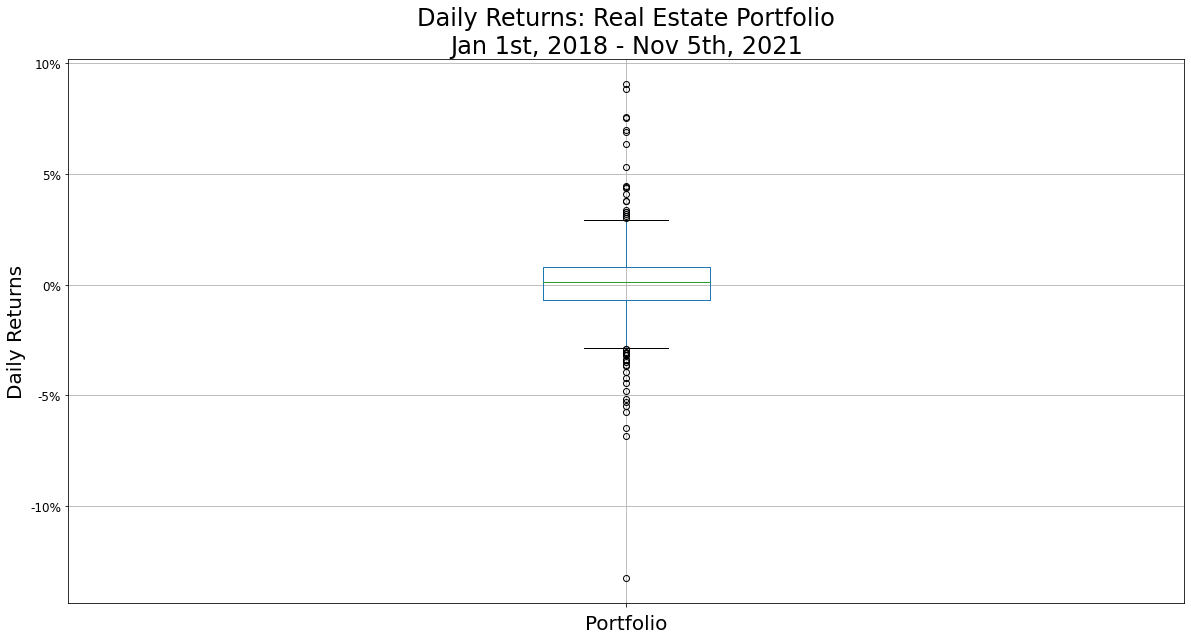

In [14]:
plot = daily_returns_df.plot(kind='box',
                        title='Daily Returns: Real Estate Portfolio\n'
                        'Jan 1st, 2018 - Nov 5th, 2021',
                        figsize=(20,10))
plot.set (xlabel='Portfolio', ylabel='Daily Return')

#format the y-axis
title =  plot.get_title()
plot.set_title(title, fontdict={'fontsize':24})
plot.set_xlabel('Portfolio', fontdict={'fontsize':20})
plot.set_ylabel('Daily Returns', fontdict={'fontsize':20})
yticks_loc = plot.get_yticks().tolist()
plot.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
plot.set_yticklabels(['{:,.0%}'.format(x) for x in yticks_loc],fontdict={'fontsize':12})
plot.set_xticklabels('')

plot.grid()

### Analyze the Risk

In [17]:
daily_returns_std_df = daily_returns_df.std()
print('DAILY RETURNS STANDARD DEVIATION')
print('================================')
daily_returns_std_df

DAILY RETURNS STANDARD DEVIATION


0.015324275134061986

In [18]:
daily_returns_annualized_std_df = daily_returns_df.std() * np.sqrt(NUM_TRADING_DAYS)
print('ANNUALIZED STANDARD DEVIATION')
print('=============================')
daily_returns_annualized_std_df

ANNUALIZED STANDARD DEVIATION


0.24326532616235402

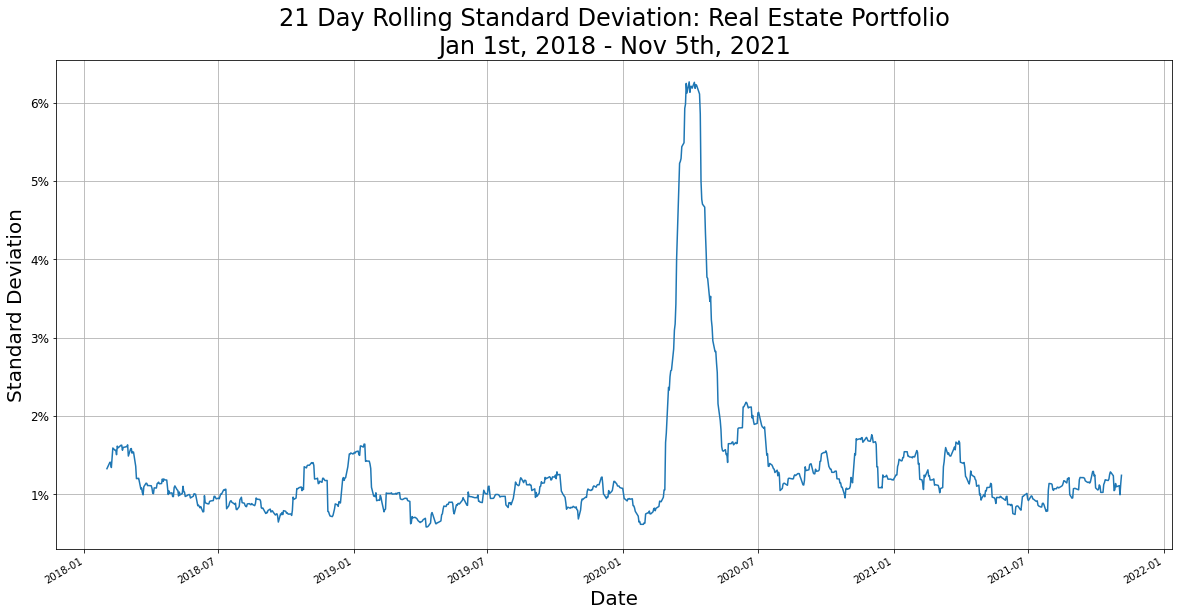

In [20]:
daily_returns_std_21_df = daily_returns_df.rolling(window=21).std()
plot = daily_returns_std_21_df.plot(title='21 Day Rolling Standard Deviation: Real Estate Portfolio\n'
                                        'Jan 1st, 2018 - Nov 5th, 2021',
                                        figsize=(20,10))

#format the y-axis
title =  plot.get_title()
plot.set_title(title, fontdict={'fontsize':24})
plot.set_xlabel('Date', fontdict={'fontsize':20})
plot.set_ylabel('Standard Deviation', fontdict={'fontsize':20})
yticks_loc = plot.get_yticks().tolist()
plot.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
plot.set_yticklabels(['{:,.0%}'.format(x) for x in yticks_loc],fontdict={'fontsize':12})

plot.grid()

### Analyze the Risk-Return Profile

In [21]:
average_annual_return_df = daily_returns_df.mean() * NUM_TRADING_DAYS
print("AVERAGE ANNUAL RETURN")
print("=====================")
average_annual_return_df

AVERAGE ANNUAL RETURN


0.17820855435805025

In [23]:
sharpe_ratio = average_annual_return_df / daily_returns_annualized_std_df
print("SHARPE RATIO")
print("=============")
sharpe_ratio

SHARPE RATIO


0.7325686614257338

### Run 10 Year Monte Carlo Simulation

In [24]:
years = 10
# weights default to being split evenly if not passed
mc = MCSimulation(
                portfolio_data = prices_df,
                num_simulation = NUM_SIMULATIONS,
                num_trading_days = NUM_TRADING_DAYS * years)

mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991511,0.989146,1.003790,0.997180,0.996466,0.996247,0.998528,1.003845,0.995780,0.998240,...,1.006566,1.001212,0.995405,0.998920,1.005283,0.995326,1.007276,1.010418,0.991865,1.011778
2,0.983770,0.985037,1.009719,0.989838,1.006611,1.002662,0.996547,1.002531,0.985149,1.003251,...,1.012896,1.003010,0.989378,0.997697,1.012141,0.997565,1.007150,1.016155,0.993945,1.001785
3,0.974245,0.987940,1.008699,0.982214,1.003617,1.009727,0.995593,0.997906,0.972750,1.007366,...,1.011803,1.003985,0.992982,0.999329,1.015747,0.995719,1.002665,1.016722,1.001475,1.011230
4,0.979246,0.996835,1.005940,0.973487,1.008403,1.009656,0.998876,1.012587,0.971874,0.996987,...,1.012323,0.992119,0.993990,1.005611,1.004177,0.994754,1.001762,1.029104,0.999830,1.004261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,10.099558,6.648729,6.633697,3.456920,5.724083,6.373122,8.068886,6.437496,4.686508,6.348878,...,6.086748,7.750862,4.931884,7.192032,8.636958,5.919154,7.113426,5.470078,16.767073,7.544923
2517,10.078835,6.678980,6.705805,3.465179,5.797674,6.422243,8.113689,6.369563,4.746521,6.322694,...,6.103289,7.817324,4.884758,7.202126,8.634386,5.997460,7.060337,5.567182,16.623172,7.623130
2518,10.098159,6.668043,6.643609,3.484613,5.781139,6.380270,7.979857,6.381006,4.720648,6.358960,...,6.140802,7.848930,4.894052,7.170354,8.567596,6.046996,7.113558,5.532839,16.641268,7.611455
2519,10.176448,6.721982,6.656545,3.464654,5.724034,6.379485,7.918384,6.403974,4.767123,6.405424,...,6.179644,7.865667,4.877543,7.229129,8.531476,6.065385,7.077251,5.502925,16.474744,7.640816


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

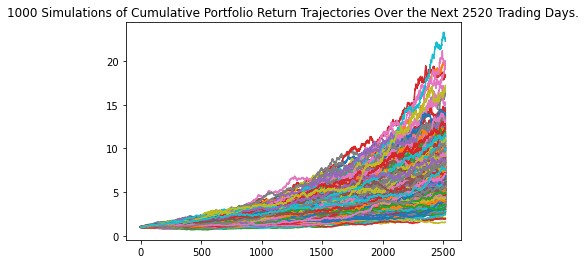

In [25]:
mc.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

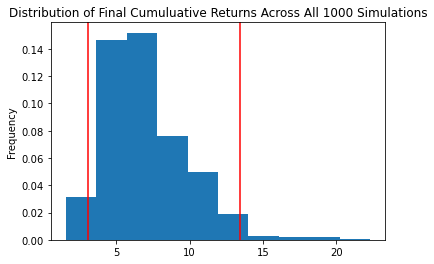

In [26]:
mc.plot_distribution()

### Calculate 10 Year Cumulative Returns

In [27]:
mc_cumulative_returns = mc.summarize_cumulative_return()
print(f'{years} year Monte Carlo summary statistics for Real Estate.')
print(mc_cumulative_returns)

10 year Monte Carlo summary statistics for Real Estate.
count           1000.000000
mean               7.004506
std                2.795725
min                1.556079
25%                4.968306
50%                6.450191
75%                8.490534
max               22.293816
95% CI Lower       3.043759
95% CI Upper      13.420013
Name: 2520, dtype: float64


In [28]:
lower_return = mc_cumulative_returns[8] * EXAMPLE_INVESTMENT
upper_return = mc_cumulative_returns[9] * EXAMPLE_INVESTMENT

print(f"Using a 95% confidence interval, the expected return of the "
    f"real estate portfolio is between {mc_cumulative_returns[8]: ,.2f}% "
    f"and {mc_cumulative_returns[9]: ,.2f}%. An initial example "
    f"investment of ${EXAMPLE_INVESTMENT: ,.2f} would be worth between "
    f"${lower_return: ,.2f} and ${upper_return: ,.2f} in {years} years")

Using a 95% confidence interval, the expected return of the real estate portfolio is between  3.04% and  13.42%. An initial example investment of $ 10,000.00 would be worth between $ 30,437.59 and $ 134,200.13 in 10 years


### Run 30 year Monte Carlo Simulation 

In [29]:
years = 30
# weights default to being split evenly if not passed
mc = MCSimulation(
                portfolio_data = prices_df,
                num_simulation = NUM_SIMULATIONS,
                num_trading_days = NUM_TRADING_DAYS * years)

mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015821,0.994781,1.004372,0.993198,1.012402,0.999666,0.997031,1.012996,1.010393,1.006051,...,1.000986,0.995405,0.998919,1.010900,0.999561,0.992817,0.999892,0.994419,0.994830,0.995702
2,1.015870,0.978761,1.003186,0.979727,1.015640,1.002543,0.998711,1.013308,1.007855,0.996725,...,1.006226,0.986531,0.994555,1.021903,1.009464,0.998128,1.004090,0.981753,0.998719,0.990671
3,1.010003,0.972775,1.016120,0.986181,1.011349,1.005391,0.994452,1.024056,1.014022,0.989700,...,0.997590,0.994165,1.001143,1.031217,0.999497,1.004290,1.000800,0.980191,1.000511,0.991069
4,1.016389,0.974772,1.019392,0.983644,1.009289,1.008975,0.993443,1.020751,1.003232,0.992061,...,1.005329,0.988727,1.002078,1.051287,1.004644,1.003669,1.007186,0.978303,0.997705,0.987186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,315.071398,261.528944,590.038736,419.307160,165.013221,183.295295,287.902862,557.675612,366.398359,880.649021,...,127.327439,474.706592,102.969340,230.541445,296.686963,85.539643,259.995479,178.896615,241.574964,1683.892347
7557,319.034381,262.411522,595.280291,415.261557,163.632287,182.883288,290.520068,565.626860,367.499768,889.703597,...,126.412220,476.454754,104.554209,227.750329,295.956834,85.855849,259.463777,179.903330,242.731789,1693.605728
7558,317.749086,259.399504,597.938958,413.674079,164.141205,182.475481,292.147080,569.096477,365.036587,881.239885,...,126.344711,477.441048,104.136903,227.716876,294.663444,86.014796,260.318046,179.362218,244.086196,1707.469344
7559,319.357520,262.509333,612.756143,409.680771,163.738318,183.028328,291.911425,570.327612,365.995585,876.861887,...,126.916611,473.228243,103.682905,226.302209,292.835682,85.700082,262.243337,180.181040,242.629195,1706.156660


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

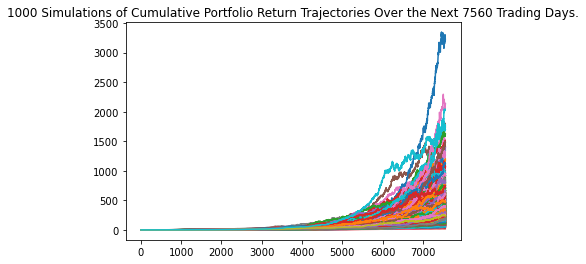

In [30]:
mc.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

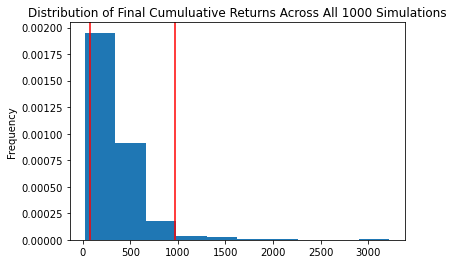

In [32]:
mc.plot_distribution()

### Calculate 30 Year Cumulative Returns

In [33]:
mc_cumulative_returns = mc.summarize_cumulative_return()
print(f'{years} year Monte Carlo summary statistics for Real Estate.')
print(mc_cumulative_returns)

30 year Monte Carlo summary statistics for Real Estate.
count           1000.000000
mean             342.893535
std              267.670052
min               21.086697
25%              175.376438
50%              274.148266
75%              421.340846
max             3223.463335
95% CI Lower      78.866880
95% CI Upper     969.900775
Name: 7560, dtype: float64


In [34]:
lower_return = mc_cumulative_returns[8] * EXAMPLE_INVESTMENT
upper_return = mc_cumulative_returns[9] * EXAMPLE_INVESTMENT

print(f"Using a 95% confidence interval, the expected returns of the "
    f"real estate portfolio is between {mc_cumulative_returns[8]: ,.2f}% "
    f"and {mc_cumulative_returns[9]: ,.2f}%. An initial example "
    f"investment of ${EXAMPLE_INVESTMENT: ,.2f} would be worth between "
    f"${lower_return: ,.2f} and ${upper_return: ,.2f} in {years} years")

Using a 95% confidence interval, the expected returns of the real estate portfolio is between  78.87% and  969.90%. An initial example investment of $ 10,000.00 would be worth between $ 788,668.80 and $ 9,699,007.75 in 30 years
